### Загрузка исходных данных

In [156]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [157]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Знакомство с данными

In [158]:
print(data.shape)
data.info()

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st     

In [159]:
# выделяем исследуемый признак
data_y = data[['SalePrice']]
data_y.head(1)

,SalePrice
0,208500


In [160]:
data.drop('SalePrice', axis=1, inplace=True)
data.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal


In [161]:
### обработка категориальных признаков

In [162]:
cat_feat = list(data.dtypes[data.dtypes == object].index)
data[cat_feat].fillna('nan')
dummy_data = pd.get_dummies(data[cat_feat], columns=cat_feat)
data.drop(cat_feat, axis=1, inplace=True)


In [163]:
num_feat = [f for f in data if f not in (cat_feat + ['Id'] )]

In [164]:
data_prepared = pd.concat([data[num_feat], dummy_data], axis=1)
data_prepared.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


### Разбиваем на тестовую и обучающую выборку

In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_prepared, data_y, test_size=0.2)

### Imputer and Scaler

In [175]:
from sklearn.preprocessing import Imputer
imp = Imputer(strategy='median')
X_train[num_feat] = imp.fit_transform(X_train.loc[:,num_feat])
X_test[num_feat] = imp.transform(X_test.loc[:,num_feat])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[num_feat] = scaler.fit_transform(X_train.loc[:,num_feat])
X_test[num_feat] = scaler.transform(X_test.loc[:,num_feat])

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [176]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1037,0.067862,-0.031913,-0.126109,1.367028,-0.516739,0.976727,0.824202,1.616560,-0.970608,-0.297675,...,0,0,0,1,0,0,0,0,1,0
1381,-0.872941,-0.031913,0.250704,-0.080559,1.261025,-0.045895,-0.742863,-0.571744,0.905722,-0.297675,...,0,0,0,1,0,0,0,0,1,0
838,-0.872941,0.236568,-0.096966,-0.804353,0.372143,0.778800,1.020085,-0.571744,-0.970608,-0.297675,...,0,0,0,1,0,0,0,0,1,0
1219,2.419869,-2.179761,-0.899164,-0.080559,-0.516739,-0.012907,-0.693893,0.732396,-0.970608,-0.297675,...,0,0,0,1,1,0,0,0,0,0
1246,0.067862,-0.210900,-0.240124,0.643234,-0.516739,1.108679,1.020085,-0.571744,-0.970608,-0.297675,...,0,1,0,0,0,0,0,0,0,1


## Алгоритмы

In [177]:
def five_feature_importances(model):
    five_feature_importances = pd.Series(model.feature_importances_).sort_values(ascending=False)[:5]
    feature_columns = X_train.columns
    for i in five_feature_importances.index:
        print(f'{feature_columns[i]} - {np.round(five_feature_importances[i],3)}')

### DecisionTreeRegressor

In [178]:
from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=10, min_samples_leaf=1)
reg_tree.fit(X_train, y_train)
y_pred_test = reg_tree.predict(X_test)
from sklearn.metrics import mean_squared_error
score_dtr = np.sqrt(mean_squared_error(y_test, y_pred_test))
print('Score DecisionTreeRegressor - {}'.format(score_dtr))

Score DecisionTreeRegressor - 34451.38544370242


In [179]:
five_feature_importances(reg_tree)

OverallQual - 0.644
GrLivArea - 0.099
2ndFlrSF - 0.038
TotalBsmtSF - 0.035
BsmtFinSF1 - 0.025


#### DecisionTreeRegressor c 10-fold кросс-валидацией

In [180]:
from sklearn.model_selection import StratifiedKFold
stack_cv = StratifiedKFold(n_splits=10, random_state=1)

result = []

for i, (train_ind, test_ind) in enumerate(stack_cv.split(X_train, y_train)):
    dtr_model = DecisionTreeRegressor(max_depth=10, min_samples_leaf=1)
    dtr_model.fit(X_train.iloc[train_ind], np.ravel(y_train.iloc[train_ind]))
    predict_y = dtr_model.predict(X_train.iloc[test_ind])
    result.append(np.sqrt(mean_squared_error(y_train.iloc[test_ind], predict_y)))
score_dtr = np.mean(result)
print(score_dtr)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


35042.38175169078


In [181]:
five_feature_importances(dtr_model)

OverallQual - 0.641
GrLivArea - 0.1
TotalBsmtSF - 0.036
2ndFlrSF - 0.034
BsmtFinSF1 - 0.026


###  RandomForestRegressor

In [182]:
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor(n_jobs=-1)
rfr_model.fit(X_train, np.ravel(y_train))
y_pred_rfr = rfr_model.predict(X_test)
score_rfr = np.sqrt(mean_squared_error(y_test, y_pred_rfr))
print(score_rfr)

28355.40669135048


In [183]:
five_feature_importances(rfr_model)

OverallQual - 0.563
GrLivArea - 0.121
TotalBsmtSF - 0.048
BsmtFinSF1 - 0.045
GarageCars - 0.028


#### RandomForestRegressor c 10-fold кросс-валидацией

In [184]:
result = []

for i, (train_ind, test_ind) in enumerate(stack_cv.split(X_train, y_train)):
    rfr_model_stack = RandomForestRegressor(n_jobs=-1)
    rfr_model_stack.fit(X_train.iloc[train_ind], np.ravel(y_train.iloc[train_ind]))
    predict_rfr = rfr_model_stack.predict(X_train.iloc[test_ind])
    result.append(np.sqrt(mean_squared_error(y_train.iloc[test_ind], predict_rfr)))
score_rfr_stack = np.mean(result)
print(score_rfr)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


28355.40669135048


In [185]:
five_feature_importances(rfr_model_stack)

OverallQual - 0.595
GrLivArea - 0.088
BsmtFinSF1 - 0.038
TotalBsmtSF - 0.033
GarageCars - 0.026


### LinearRegression

In [190]:
from sklearn.linear_model import LinearRegression
lin_reg_model = LinearRegression(n_jobs=-1)
lin_reg_model.fit(X_train, y_train)
y_pred_lr = lin_reg_model.predict(X_test)
scores_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(scores_lr)

44065179130114.58


In [191]:
result = []

for i, (train_ind, test_ind) in enumerate(stack_cv.split(X_train, y_train)):
    lr_model = LinearRegression(n_jobs=-1)
    lr_model.fit(X_train.iloc[train_ind], np.ravel(y_train.iloc[train_ind]))
    predict_lr = lr_model.predict(X_train.iloc[test_ind])
    result.append(np.sqrt(mean_squared_error(y_train.iloc[test_ind], predict_lr)))
score_lr_st = np.mean(result)
print(score_lr_st)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


1078513503262149.2


### SGDRegressor

In [192]:
from sklearn.linear_model import SGDRegressor
SGDR_model =  SGDRegressor()
SGDR_model.fit(X_train, np.ravel(y_train))
y_pred_sgdr = SGDR_model.predict(X_test)
score_sgdr = np.sqrt(mean_squared_error(y_test, y_pred_sgdr))
print(score_sgdr)

28492.458863331914


C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


#### SGDRegressor с  c 10-fold кросс-валидацией

In [193]:
result = []

for i, (train_ind, test_ind) in enumerate(stack_cv.split(X_train, y_train)):
    sgdr_model = SGDRegressor()
    sgdr_model.fit(X_train.iloc[train_ind], np.ravel(y_train.iloc[train_ind]))
    predict_sgdr = sgdr_model.predict(X_train.iloc[test_ind])
    result.append(np.sqrt(mean_squared_error(y_train.iloc[test_ind], predict_sgdr)))
score_sgdr_st = np.mean(result)
print(score_sgdr_st)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


42042.469192125434


### ARDRegression

In [144]:
from sklearn.linear_model import ARDRegression
ardr_model = ARDRegression()
ardr_model.fit(X_train, np.ravel(y_train))
y_pred_ardr = ardr_model.predict(X_test)
score_ardr = np.sqrt(mean_squared_error(y_test, y_pred_ardr))
print(score_ardr)                     

34648.608642070314


In [146]:
result = []

for i, (train_ind, test_ind) in enumerate(stack_cv.split(X_train, y_train)):
    a_model = ARDRegression()
    a_model.fit(X_train.iloc[train_ind], np.ravel(y_train.iloc[train_ind]))
    predict_a = a_model.predict(X_train.iloc[test_ind])
    result.append(np.sqrt(mean_squared_error(y_train.iloc[test_ind], predict_a)))
score_ardr_st = np.mean(result)
print(score_ardr_st)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


35296.232020704425


## Стекинг 

In [194]:
# стекинг
def get_meta_features(clf, X_train, y_train, X_test, stack_cv):
    meta_train = np.zeros_like(y_train, dtype=float)
    meta_test = np.zeros_like(y_test, dtype=float)
    
    for i, (train_ind, test_ind) in enumerate(stack_cv.split(X_train, y_train)):
        
        clf.fit(X_train.iloc[train_ind], np.ravel(y_train.iloc[train_ind]))
        meta_train[test_ind] = clf.predict(X_train.iloc[test_ind]).reshape(len(test_ind),1)
        meta_test += clf.predict(X_test).reshape(len(X_test),1)
    
    return meta_train, meta_test / stack_cv.n_splits

In [195]:
from sklearn.model_selection import StratifiedKFold

stack_cv = StratifiedKFold(n_splits=10, random_state=555)

meta_train = []
meta_test = []
col_names = []

print('DecisionTreeRegressor')
meta_tr, meta_te = get_meta_features(reg_tree, X_train, y_train, X_test, stack_cv)
meta_train.append(meta_tr)
meta_test.append(meta_te)
col_names.append('DTR_pred')

print('RandomForestRegressor')
meta_tr, meta_te = get_meta_features(rfr_model, X_train, y_train, X_test, stack_cv)
meta_train.append(meta_tr)
meta_test.append(meta_te)
col_names.append('RFR_pred')

# print('LinearRegression')
# meta_tr, meta_te = get_meta_features(lin_reg_model, X_train, y_train, X_test, stack_cv)
# meta_train.append(meta_tr)
# meta_test.append(meta_te)
# col_names.append('LR_pred')

print('SGDRegressor')
meta_tr, meta_te = get_meta_features(SGDR_model, X_train, y_train, X_test, stack_cv)
meta_train.append(meta_tr)
meta_test.append(meta_te)
col_names.append('SGDR_pred')


DecisionTreeRegressor


C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


RandomForestRegressor
SGDRegressor


C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [196]:
X_meta_train = pd.DataFrame(np.hstack(meta_train), columns=col_names)                             
X_meta_train.head()

,DTR_pred,RFR_pred,SGDR_pred
0,222000.000000,284100.0,235614.668783
1,174814.814815,210850.0,217008.252225
2,113000.000000,137050.0,139686.455698
3,79000.000000,114400.0,81743.928227
4,205700.000000,197340.0,174468.425757


In [197]:
X_meta_test = pd.DataFrame(np.hstack(meta_test), columns=col_names)
X_meta_test.head()

,DTR_pred,RFR_pred,SGDR_pred
0,295874.188889,340383.30,330236.582703
1,137968.000000,177431.32,205702.116286
2,158442.339683,162703.14,145646.929991
3,135028.125863,137831.49,147957.733172
4,96249.267677,125913.89,99587.166667


In [198]:
# метаалгоритм
lin_reg_model = LinearRegression(n_jobs=-1)
lin_reg_model.fit(X_meta_train, y_train)

y_pred_meta_test = lin_reg_model.predict(X_meta_test)

In [199]:
scores_stacking = np.sqrt(mean_squared_error(y_test, y_pred_meta_test))
print(scores_stacking)

25132.449931112926


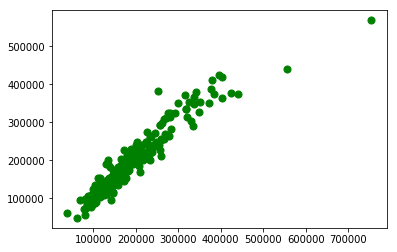

In [200]:
plt.scatter(y_test, y_pred_meta_test, c='green', s=50, cmap='rainbow')
plt.show()